In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [5]:
df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
#print(df.keys())
print('Intial number of rows:', df.shape )

# remove the 'customerID' from the list.
df.drop(['customerID'],axis=1, inplace=True)

# replace the space with nan and remove the non from rows.
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)
print('Number of rows after removing empty spaces:', df.shape)
df.head()

Intial number of rows: (7043, 21)
Number of rows after removing empty spaces: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('Percent of No Churn', df['Churn'].value_counts()[0]/len(df) * 100)
print('Percent of Churn', df['Churn'].value_counts()[1]/len(df) * 100)

Percent of No Churn 73.42150170648463
Percent of Churn 26.578498293515356


# Preprocessing:

## Categorical features:
There are three numerical comlumns. We can also take look at the distribution of each feature.

Remove outliers in  numberical comlumns. The outlier is any type of data which is more than 3 time of standard deviation away from the mean of data.


In binary columns, just replace values with 1 and 0

In [4]:

# we have 16 binary columns
binary_col = [ 'gender','SeniorCitizen' , 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

numeric_col = ['TotalCharges', 'MonthlyCharges', 'tenure']


for var in binary_col:
    df[var] = df[var].replace('No phone service' , 'No')
    df[var] = df[var].replace('No internet service' , 'No')
    df[var] = df[var].astype("category")
    #df[var] = df[var].cat.codes
    #print(var, df[var].unique())
    #df[var] = df[var].astype("category")
    
#df[var] = df[var].cat.codes


df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('Percent of No Churn', df['Churn'].value_counts()[0]/len(df) * 100)
print('Percent of Churn', df['Churn'].value_counts()[1]/len(df) * 100)

Percent of No Churn 73.42150170648463
Percent of Churn 26.578498293515356


# Using statistics to define normal behavior
We want to see if Churn is related to any of other categoreis. We can see below that Churn0 is concentrated on low tenure and charn1 is around high one.  

NameError: name 'binary_col' is not defined

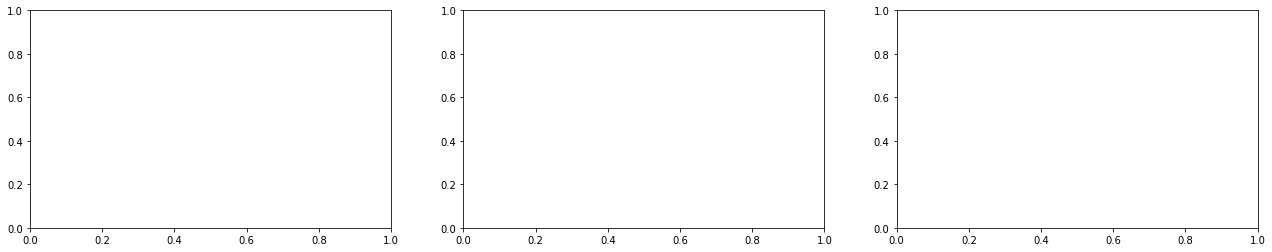

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(22,4))
dfcat=pd.DataFrame()

for var in binary_col:
    df[var] = df[var].astype("category")
    df[var] = df[var].cat.codes
    #print(var, df[var].unique())
    #df[var] = df[var].astype("category")    
#df[var] = df[var].cat.codes




#df['TotalCharges'] = df['TotalCharges'].astype(float)

df_churn0 = df.loc[df['Churn']== 0]
df_churn1 = df.loc[df['Churn']== 1]
       

sn.distplot(df_churn0['TotalCharges'], ax=ax[0], color='b', label="0")
sn.distplot(df_churn1['TotalCharges'], ax=ax[0], color='r', label="1")
ax[0].set_title('Distribution of TotalCharges', fontsize=12)

sn.distplot(df_churn0['MonthlyCharges'], ax=ax[1], color='b', label="churn0")
sn.distplot(df_churn1['MonthlyCharges'], ax=ax[1], color='r', label="churn1")
ax[1].set_title('Distribution of MonthlyCharges', fontsize=12)


sn.distplot(df_churn0['tenure'], ax=ax[2], color='b', label="churn0")
sn.distplot(df_churn1['tenure'], ax=ax[2], color='r', label="churn1")
ax[2].set_title('Distribution of tenure', fontsize=12)




Text(0.5, 1.0, 'Distribution of tenure')

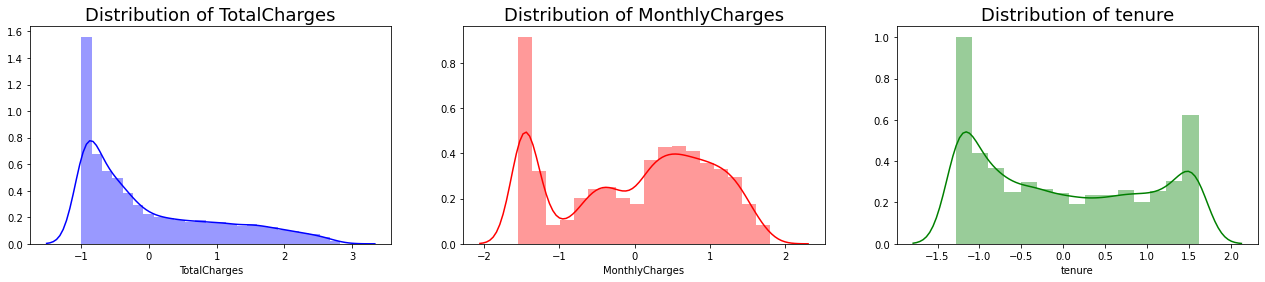

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(22,4))

from sklearn.preprocessing import StandardScaler

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_col].astype('float64')),
                       columns=numeric_col)

sn.distplot(df_std['TotalCharges'], ax=ax[0], color='b')
ax[0].set_title('Distribution of TotalCharges', fontsize=18)

sn.distplot(df_std['MonthlyCharges'], ax=ax[1], color='r')
ax[1].set_title('Distribution of MonthlyCharges', fontsize=18)


sn.distplot(df_std['tenure'], ax=ax[2], color='g')
ax[2].set_title('Distribution of tenure', fontsize=18)

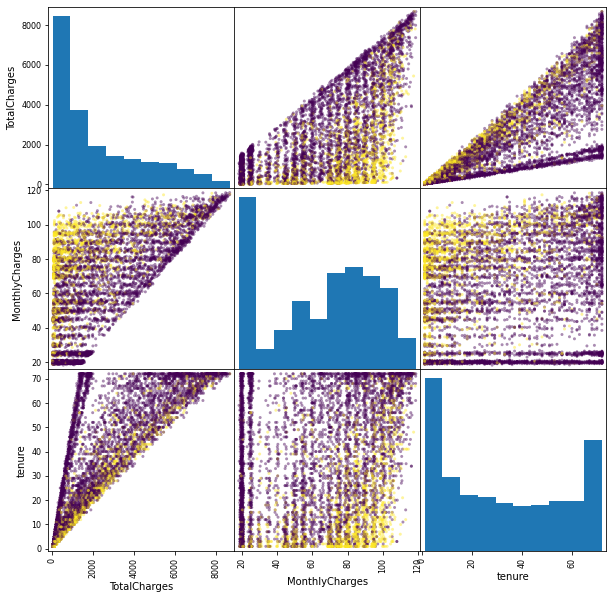

In [8]:
numeric_columns = ['TotalCharges', 'MonthlyCharges', 'tenure']
color = df['Churn'].tolist()

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(df[numeric_columns], c=color ,  
                           # Make figure large to show details
                           figsize = [10,10], 
                           # Lower point opacity to show overlap
                           alpha = 0.45)


plt.show()

In [9]:
list1= []
dict1 = {}
dicttotal = {}
# we have 16 binary columns
binary_col = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for k in binary_col:
    list1= []
    for i in range(2):        
        for j in range(2):        
            num = (df.loc[(df[k]== i) & (df['Churn']== j)].shape[0]) * 100 /(df.loc[df['Churn']].shape[0])
            list1.append(num)
        #dict1[i]=list1
    #print(list1)
    dict1[k]=list1
dict1
#dicttotal[k].update(dict1[k])
    

dfss = pd.DataFrame.from_dict(dict1, columns=['NoChurn_NoProperties', 'Chrun_NoProperties','NoChurn_Properties','Churn_Properties' ], orient='index') 
dfs = dfss.sort_values('NoChurn_NoProperties', ascending=False)
dfs
 

,NoChurn_NoProperties,Chrun_NoProperties,NoChurn_Properties,Churn_Properties
SeniorCitizen,63.950512,19.809443,9.470990,6.769056
OnlineSecurity,48.961889,22.383390,24.459613,4.195108
TechSupport,48.819681,22.170080,24.601820,4.408419
Dependents,48.208191,21.942548,25.213311,4.635950
DeviceProtection,46.786121,18.828214,26.635381,7.750284
StreamingTV,46.558589,15.002844,26.862912,11.575654
OnlineBackup,46.373720,19.141069,27.047782,7.437429
StreamingMovies,46.217292,14.945961,27.204209,11.632537
MultipleLines,43.316268,14.490899,30.105233,12.087600
gender,36.177474,13.353242,37.244027,13.225256


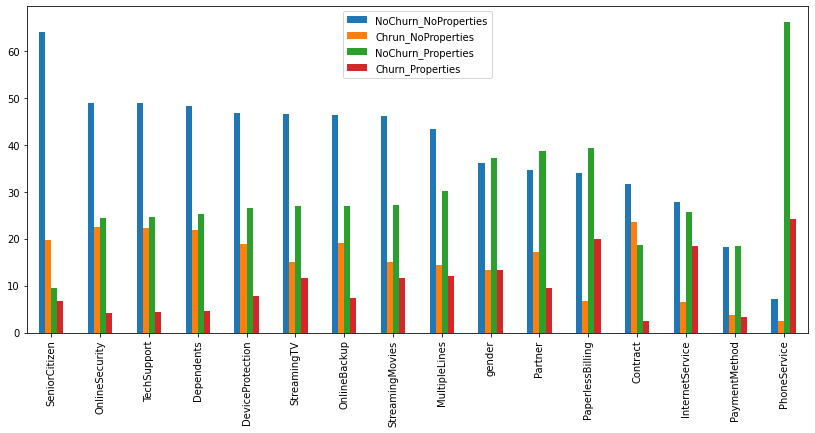

In [10]:
dfs.plot.bar(figsize = [14,6])


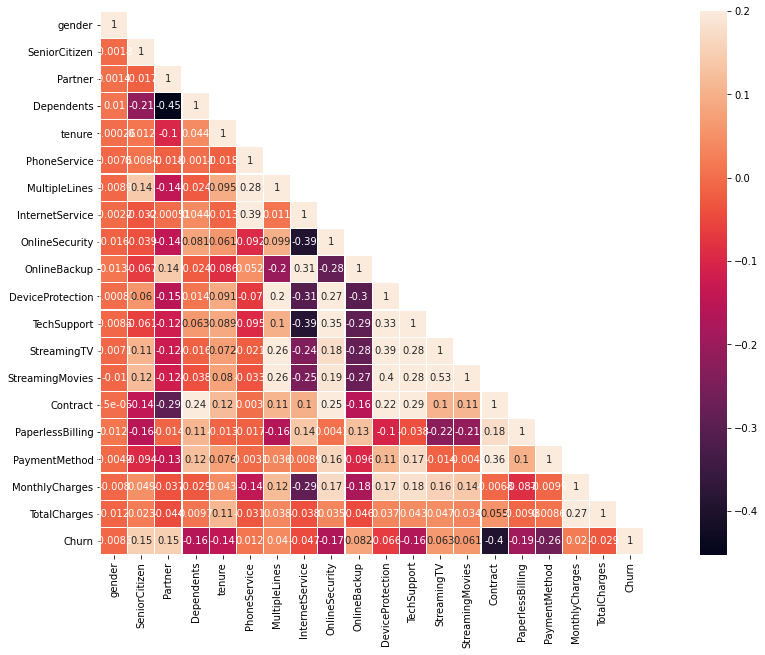

In [11]:
corrMatt = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=0.2, square=True, annot=True,  linewidths=.2)

# Feature selection and prediction

We want to check what is the most important parameter for the Churn. We have 3 colums with more that 2 categorical features. Therefore, we need to do one_hot_encoding.

In [110]:
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
#print(df.keys())
print('Intial number of rows:', df.shape )

# remove the 'customerID' from the list.
df.drop(['customerID'],axis=1, inplace=True)

# replace the space with nan and remove the non from rows.
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)
print('Number of rows after removing empty spaces:', df.shape)


numeric_col = ['TotalCharges', 'MonthlyCharges', 'tenure']


df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_col].astype('float64')),
                       columns=numeric_col)

dr22 = df.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)
df = pd.concat([df_std, dr22], axis=1, join='inner')
df = pd.get_dummies(df)

# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']

X, y = df.drop(drop,axis=1), df['Churn_Yes']
X.head()


Intial number of rows: (7043, 21)
Number of rows after removing empty spaces: (7032, 20)


,TotalCharges,MonthlyCharges,tenure,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.994194,-1.161694,-1.280248,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,-0.173740,-0.260878,0.064303,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.959649,-0.363923,-1.239504,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,-0.195248,-0.747850,0.512486,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,-0.940457,0.196178,-1.239504,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [111]:

def roc(model, X_test,y_test):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    

def fig(sorted_importances, conf_mat, model):
    fig, ax = plt.subplots(1, 3, figsize=(22,8))
    sn.barplot(y=sorted_importances.index, x=sorted_importances.values,  orient='h', ax=ax[0])
    ax[0].set_title('Distribution of TotalCharges', fontsize=18)
    sn.heatmap(conf_mat, ax=ax[1], annot=True, fmt="d",cmap="YlGnBu", vmin=0, vmax=1392)
    ax[1].set_title('Distribution of MonthlyCharges', fontsize=18)
    (roc(model, X_test,y_test))
    ax[2].set_title('Distribution of MonthlyCharges', fontsize=18)
 



Best hyerparameters:
 {'max_depth': 1, 'max_features': 0.1, 'n_estimators': 100, 'subsample': 0.4}
ROC AUC score: 0.69
Classifcation report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1546
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2107
   macro avg       0.72      0.69      0.70      2107
weighted avg       0.77      0.78      0.77      2107

Confusion matrix_sgbt:
 [[1377  169]
 [ 289  272]]


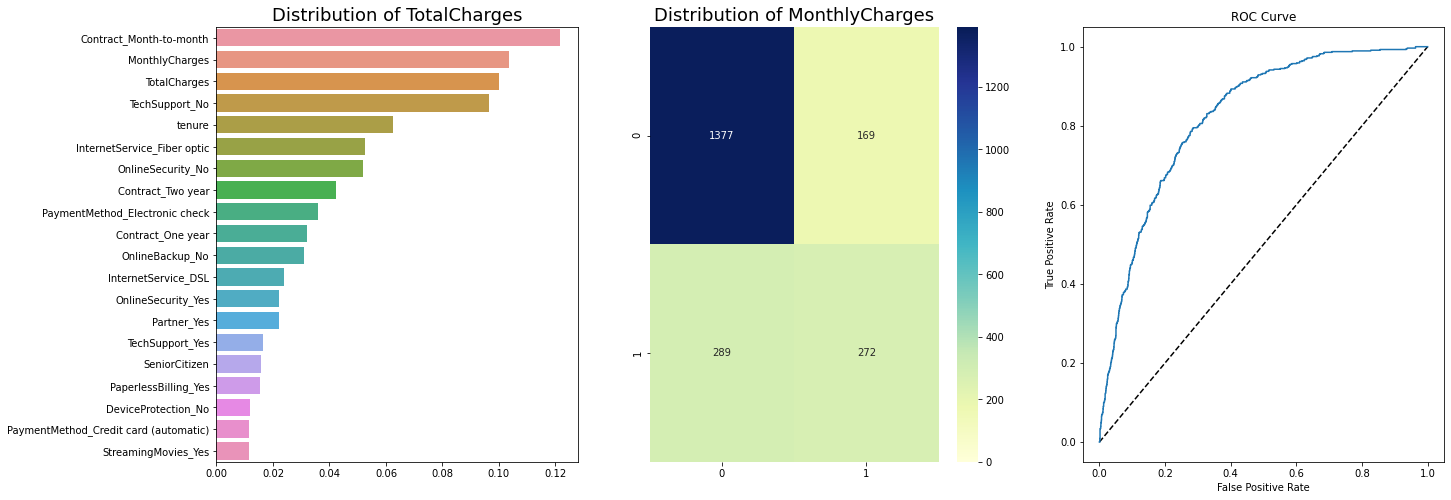

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.3,
                                    random_state=SEED)

# Instantiate a stochastic GradientBoostingClassifier 'sgbt'
sgbt = GradientBoostingClassifier(max_depth=4, 
                                subsample=0.4,
                                max_features=0.2,
                                n_estimators=100,
                                random_state=SEED)

# Define the dictionary 'params_rf'
params_sgbt = {
             'n_estimators': [100, 150 ],
             'max_depth': [1, 2, 4],
             'max_features': [0.1, 0.2], 
             'subsample': [0.2, 0.4]
             }

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=sgbt,
                       param_grid=params_sgbt,
                       scoring='accuracy',
                       cv=3,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_

print('Best hyerparameters:\n', best_hyperparams)


# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute roc_auc_score
rmse_test = roc_auc_score(y_test, y_pred)


# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred = sgbt.predict(X_test)

# Evaluate test-set roc_auc_score
sgbt_roc_auc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(sgbt_roc_auc_score))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat_sgbt = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix_sgbt:\n', conf_mat_sgbt)

#######################################################

from sklearn.metrics import auc
auc_rf = auc(fpr_keras, tpr_keras)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)

from sklearn.metrics import roc_curve


y_pred_sgbt = sgbt.predict_proba(X_test)[:, 1]
fpr_sgbt, tpr_sgbt, thresholds_sgbt = roc_curve(y_test, y_pred_sgbt)
auc_sgbt = auc(fpr_sgbt, tpr_sgbt)




########################################################
# Plot features importances, just the top 20 features
importances_sgbt = pd.Series(data= sgbt.feature_importances_.reshape(40), index= X_train.columns)
sorted_importances_sgbt = importances_sgbt.sort_values(ascending=False).head(20)


fig(sorted_importances_sgbt, conf_mat_sgbt, sgbt )


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1546
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2107
   macro avg       0.74      0.71      0.72      2107
weighted avg       0.79      0.79      0.79      2107

Confusion matrix_lr:
 [[1369  177]
 [ 258  303]]


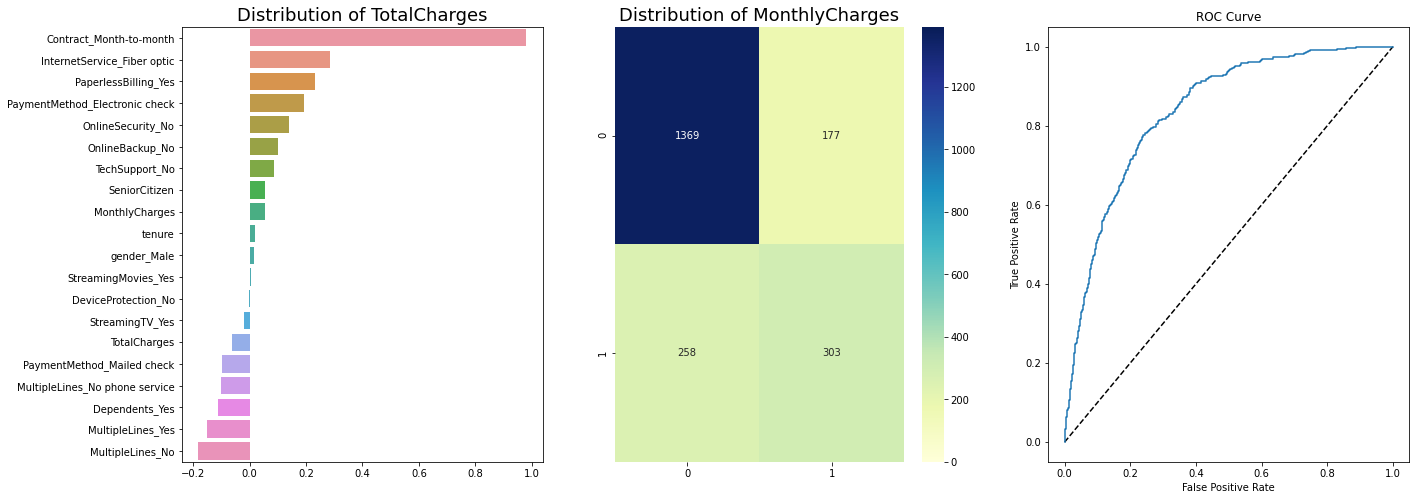

In [113]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Create the classifier: logreg
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Fit the classifier to the training data
lr.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = lr.predict(X_test)

# Compute and print the confusion matrix and classification report
conf_mat_lr = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion matrix_lr:\n', conf_mat_lr)


#Plot features importances, just the top 20 features
importances_lr = pd.Series(data= lr.coef_.reshape(40), index= X_train.columns)
sorted_importances_lr = importances_lr.sort_values(ascending=False).head(20)



fig(sorted_importances_lr, conf_mat_lr, lr)

## Synthetic Minority oversampling Technique  (SMOTE)
Uses the characteristics of nearest neighbours of minory cases to creat new synthetic of fraud cases and avoid duplicating. 
-Resampling should be applied on the training set.
do the training and test set and then resample the traning set.

If you want to do the cross validation, you should do it first and then do the oversampling or under sampling.

In [114]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X_train, y_train)


# Create the classifier: logreg
lr_s = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Fit the classifier to the training data
lr_s.fit(X_resampled, y_resampled)

# Predict the labels of the test set: y_pred
y_pred = lr_s.predict(X_test)

# Compute and print the confusion matrix and classification report
conf_mat_lr_s = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion matrix_lr_s:\n', conf_mat_lr)


#Plot features importances, just the top 20 features
importances_lr = pd.Series(data= lr_s.coef_.reshape(40), index= X_train.columns)
sorted_importances_lr = importances_lr.sort_values(ascending=False).head(20)




fig(sorted_importances_lr, conf_mat_lr, lr_s)

AttributeError: 'SMOTE' object has no attribute '_validate_data'

# Model adjustments in ensemble methods: Voting classifier

A simple way to adjust our models to deal with imbalanced data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.
Adjusting your Random Forest to fraud detection. We'll define weights manually, to be able to off-set that imbalance slightly. In our case we have 25 percent churn to 75 non-churn cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier


def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  #probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  #print('Confusion matrix_ensemble:\n', conf_mat_ensemble)
  conf_mat_ensemble = confusion_matrix(y_test, y_pred)
  return conf_mat_ensemble


# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:1}, random_state=SEED, max_iter=1000)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=SEED)
clf3 = DecisionTreeClassifier(random_state=SEED, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard', weights=[1, 1, 1])


# Predict the labels of the test set: y_pred
y_pred = ensemble_model.fit(X_train, y_train).predict(X_test)

# Compute and print the confusion matrix and classification report
conf_mat_ensemble = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion matrix_ensemble:\n', conf_mat_lr)


              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1546
           1       0.51      0.67      0.58       561

    accuracy                           0.74      2107
   macro avg       0.69      0.72      0.69      2107
weighted avg       0.77      0.74      0.75      2107

Confusion matrix_ensemble:
 [[1369  177]
 [ 258  303]]


In [32]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [85]:
from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import BatchNormalization


# Set a random seed
n_inputs = X_train.shape[1]

# Return a new model with the given activation
 
model = Sequential()
model.add(Dense(n_inputs, input_shape=(n_inputs,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________


In [94]:
from keras.wrappers.scikit_learn import KerasClassifier
model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)



y_pred_round = (model.predict(X_test).round(0).astype(int))

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

#Compute and print the confusion matrix and classification report
conf_deep = confusion_matrix(y_test, y_pred_round)
print(classification_report(y_test, y_pred_round))
print('Confusion matrix_deep:\n', conf_deep)



Epoch 1/5
4914/4914 [==============================] - 0s 23us/step - loss: 0.4262 - accuracy: 0.7890
Epoch 2/5
4914/4914 [==============================] - 0s 23us/step - loss: 0.4247 - accuracy: 0.7877
Epoch 3/5
4914/4914 [==============================] - 0s 24us/step - loss: 0.4237 - accuracy: 0.7908
Epoch 4/5
4914/4914 [==============================] - 0s 21us/step - loss: 0.4231 - accuracy: 0.7910
Epoch 5/5
4914/4914 [==============================] - 0s 23us/step - loss: 0.4226 - accuracy: 0.7930
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1546
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2107
   macro avg       0.73      0.70      0.71      2107
weighted avg       0.78      0.79      0.78      2107

Confusion matrix_deep:
 [[1377  169]
 [ 272  289]]


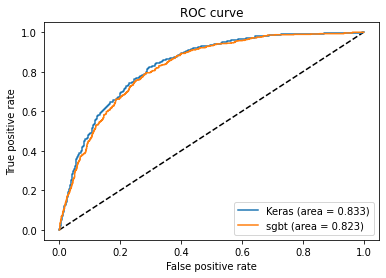

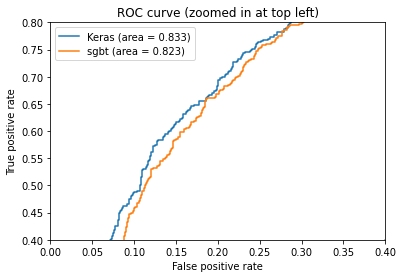

In [107]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_sgbt, tpr_sgbt, label='sgbt (area = {:.3f})'.format(auc_sgbt))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.4, 0.8)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_sgbt, tpr_sgbt, label='sgbt (area = {:.3f})'.format(auc_sgbt))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [92]:
from sklearn.metrics import roc_curve


# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train for 100 epochs using a validation split of 0.2
history = model.fit(X_train, y_train, epochs=2, verbose= 0, batch_size= 1)

y_pred = (model.predict(X_test).round(0).astype(int))

#y_pred = model.predict(X_test).ravel()

#fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

#Compute and print the confusion matrix and classification report
conf_deep = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion matrix_deep:\n', conf_deep)


#Plot features importances, just the top 20 features
#importances_lr = pd.Series(data= lr.coef_.reshape(40), index= X_train.columns)
#sorted_importances_lr = importances_lr.sort_values(ascending=False).head(20)





#fig(sorted_importances_lr, conf_mat_lr, lr)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1546
           1       0.62      0.56      0.59       561

    accuracy                           0.79      2107
   macro avg       0.73      0.72      0.72      2107
weighted avg       0.78      0.79      0.79      2107

Confusion matrix_deep:
 [[1351  195]
 [ 247  314]]


In [93]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [73]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
thresholds_keras.shape

(3,)

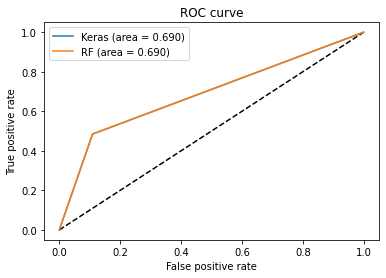

In [74]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [40]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
def roc(X_test,y_test, fpr,tpr):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
  

    
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))
    
    
def heatmap(conf_mat_lr):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sn.heatmap(pd.DataFrame(conf_mat_lr), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [42]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Take the float values of df for X
X = df.values.astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)


# Define the range of clusters to try
clustno = range(1, 14)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

AttributeError: 'MiniBatchKMeans' object has no attribute '_validate_data'

# Categorical features


In [238]:
X_train.head()

,TotalCharges,MonthlyCharges,tenure,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1303,0.175085,0.357394,0.145791,0,0,1,1,1,0,2,0,0,0,0,0,0,2,0,0
3018,1.789456,0.827747,1.612573,1,1,0,0,1,1,2,0,0,0,0,0,0,2,0,1
3739,-0.712209,0.978991,-1.035784,1,0,0,0,1,1,2,0,0,0,0,0,0,1,0,2
2977,-0.534587,-1.460858,0.797694,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,3
5347,-0.575617,-0.977209,-0.261649,1,0,1,0,1,1,1,1,1,1,1,1,1,2,1,1


# Corrlation between numerical and categorical features.